#### Logistic Regression implementation

***Problem Identification***
- mission is to predict which of the previous customers will buy a brand new car released by the company
- Using the given [DataSet](../dataFiles/Social_Network_Ads.csv)
- Features include: Age, EstimatedSalary as independent variables
- Purchased - as the dependent variable

- model should predict for new customers of a given age and salary range the model should make a prediction, these customers can then be targetted by the relevant marketing Ads

***Importing Libraries***

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Importing dataset***

In [ ]:
dataset = pd.read_csv('../dataFiles/Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f'{x}\n{y}')

***Splitting the data into the Training and Test set***

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 0)


In [ ]:
print(f'{x_train}{y_train}{x_test}{y_test}')

***Feature Scaling***

In [59]:
#no need to scale the dependent variable values as they are already in  the range of 0 and 1
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



***Training the Logistic Regression Model on the Training Set**

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train) # pass independent and dependent train variables

LogisticRegression(random_state=0)

***Predicting a new result***
- predicting a purchase decision of a customer who is 30 years and earns 87000

In [61]:
# since mode is trained on feature scaled values
#convert the values to the scale used for training using the transform method
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


***Predicting the test set results***

In [ ]:
#getting vectors of predictions
y_pred = classifier.predict(x_test) 
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)) 

***Making the confusion Matrix***

- show the number of correct and incorrect predictions

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[63  5]
 [ 8 24]]


***Analysis***
- There were 63 of the correct predictions of the class 0
- 24 of the correct predictions of class 1
- 5 incorrect predictions of class 1
- 8 incorrect predictions of class 0 

In [64]:
#computing the accuracy of the model - rate of correct predictions
from sklearn.metrics import accuracy_score
accuracyScore = accuracy_score(y_test, y_pred, normalize=False)

print(f'Accuracy score: {accuracyScore}')

Accuracy score: 87


***Visualising the Training Set Results***

- 2d plot - x axis will be age and y will be estimated salary
- plot of regions where the model predicts class 0 and region where the model predicts class 1
- curve separating the regions

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18492\3308878111.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


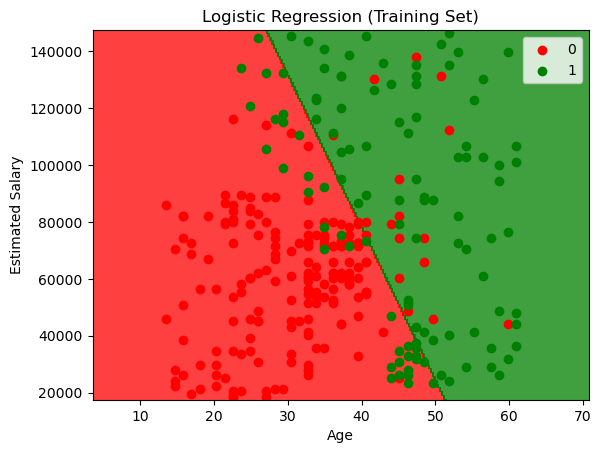

In [68]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform (x_train), y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop=x_set[:,0].max() + 10, step= 0.25),
                     np.arange(start =x_set[:,1].min() - 1000, stop = x_set[:,1].max() + 1000, step = 0.25))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                      alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- all points are the real customer 
- green are customers who bought previously
- red are those who did not buy
- if a point falls in the wrong region i.e. opposite colour then it was predicted wrongly by the model
- The prediction Boundary is the boundary between the two classes i.e. class 0 and class 1
- its a straight line because it is a liner classifier

***Visualising the test set Results***

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18492\37457429.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


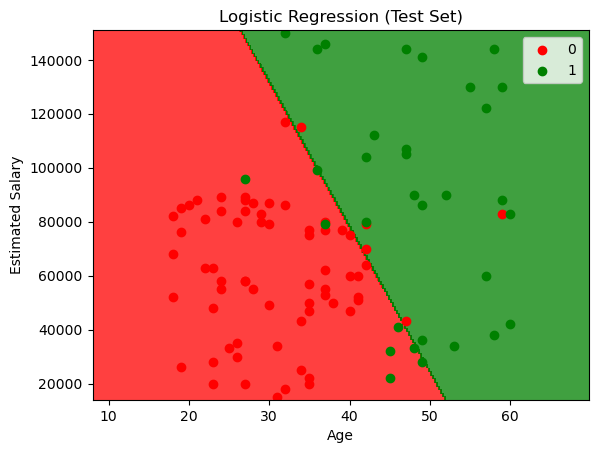

In [70]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform (x_test), y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop=x_set[:,0].max() + 10, step= 0.25),
                     np.arange(start =x_set[:,1].min() - 1000, stop = x_set[:,1].max() + 1000, step = 0.25))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                      alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- It shows that the model worked well on the data on which it was not trained, there are some incorrect predictions but overall the model did well.

- Logistic regression does a good job at separating the classes
- we would be better off to get a model which offer less errors but optimally we would prefer to have one with non linear classifiers.